In [1]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), "..", ".."))

if project_root not in sys.path:
    sys.path.append(project_root)

In [2]:
from spectral_clustering import *
from stability_analysis import *
from parameter_fitting import *

import numpy as np
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt

In [3]:
import warnings

warnings.filterwarnings(
    "ignore", message="KMeans is known to have a memory leak on Windows with MKL"
)

random_state = 1

In [4]:
parameter_grid_knn = {
    "sim_graph_type": ["knn"],
    "K": [50],  # Just a place holder, doesn't affect anything
    "sigma": [0],
    "knn": [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 20, 25, 30, 40, 50, 60],
    "mutual_knn": [0],
    "epsilon": [0],
}

In [5]:
blobs_data, blobs_labels = make_blobs(
    n_samples=[500, 50, 50],
    centers=[[0, 0], [5, 5], [5, -5]],
    cluster_std=[2.5, 0.3, 0.3],
    random_state=random_state,
)

distance_matrix = get_distance_matrix_from_data(blobs_data)

In [6]:
best_params_knn = find_best_params_with_eigengap_grid_search(
    distance_matrix, param_grid=parameter_grid_knn, random_state=random_state
)
print(best_params_knn)

{'K': 50, 'epsilon': 0, 'knn': 5, 'mutual_knn': 0, 'sigma': 0, 'sim_graph_type': 'knn'}
Eigengap:  0.0
Average eigenvalue:  -2.0702330720174427e-16
Estimated K:  2

{'K': 50, 'epsilon': 0, 'knn': 6, 'mutual_knn': 0, 'sigma': 0, 'sim_graph_type': 'knn'}
Eigengap:  0.0

{'K': 50, 'epsilon': 0, 'knn': 7, 'mutual_knn': 0, 'sigma': 0, 'sim_graph_type': 'knn'}
Eigengap:  0.0

{'K': 50, 'epsilon': 0, 'knn': 8, 'mutual_knn': 0, 'sigma': 0, 'sim_graph_type': 'knn'}
Eigengap:  0.0

{'K': 50, 'epsilon': 0, 'knn': 9, 'mutual_knn': 0, 'sigma': 0, 'sim_graph_type': 'knn'}
Eigengap:  0.0

{'K': 50, 'epsilon': 0, 'knn': 10, 'mutual_knn': 0, 'sigma': 0, 'sim_graph_type': 'knn'}
Eigengap:  0.0

{'K': 50, 'epsilon': 0, 'knn': 11, 'mutual_knn': 0, 'sigma': 0, 'sim_graph_type': 'knn'}
Eigengap:  0.01012542799559733
Average eigenvalue:  2.5818366409057676e-05
Estimated K:  3

{'K': 50, 'epsilon': 0, 'knn': 12, 'mutual_knn': 0, 'sigma': 0, 'sim_graph_type': 'knn'}
Eigengap:  0.012409749871425011
Average eige

In [7]:
similarity_matrix_knn = get_similarity_matrix_from_distance_matrix(
    distance_matrix,
    sim_graph_type=best_params_knn["sim_graph_type"],
    knn=best_params_knn["knn"],
)

res_knn = Spectral_Clustering(
    similarity_matrix_knn,
    K=best_params_knn["K"],
    random_state=random_state,
)

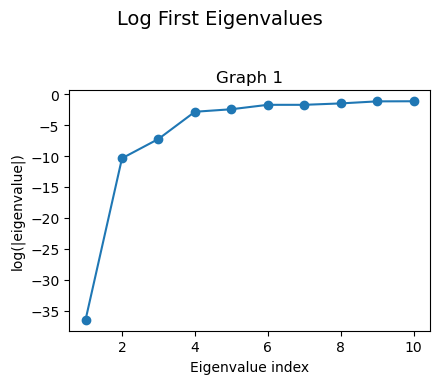

In [8]:
plot_eigenvalues([res_knn.eigenvalues])

In [9]:
parameter_grid_mutual_knn = {
    "sim_graph_type": ["mutual_knn"],
    "K": [50],  # Just a place holder, doesn't affect anything
    "sigma": [0],
    "knn": [0],
    "mutual_knn": [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 20, 25, 30, 40, 50, 60],
    "epsilon": [0],
}

In [10]:
best_params_mutual_knn = find_best_params_with_eigengap_grid_search(
    distance_matrix, param_grid=parameter_grid_mutual_knn, random_state=random_state
)
print(best_params_mutual_knn)

{'K': 50, 'epsilon': 0, 'knn': 0, 'mutual_knn': 5, 'sigma': 0, 'sim_graph_type': 'mutual_knn'}
Eigengap:  0.0
Average eigenvalue:  -6.155917306422177e-16
Estimated K:  2

{'K': 50, 'epsilon': 0, 'knn': 0, 'mutual_knn': 6, 'sigma': 0, 'sim_graph_type': 'mutual_knn'}
Eigengap:  0.0

{'K': 50, 'epsilon': 0, 'knn': 0, 'mutual_knn': 7, 'sigma': 0, 'sim_graph_type': 'mutual_knn'}
Eigengap:  0.0

{'K': 50, 'epsilon': 0, 'knn': 0, 'mutual_knn': 8, 'sigma': 0, 'sim_graph_type': 'mutual_knn'}
Eigengap:  0.0

{'K': 50, 'epsilon': 0, 'knn': 0, 'mutual_knn': 9, 'sigma': 0, 'sim_graph_type': 'mutual_knn'}
Eigengap:  0.0

{'K': 50, 'epsilon': 0, 'knn': 0, 'mutual_knn': 10, 'sigma': 0, 'sim_graph_type': 'mutual_knn'}
Eigengap:  0.0

{'K': 50, 'epsilon': 0, 'knn': 0, 'mutual_knn': 11, 'sigma': 0, 'sim_graph_type': 'mutual_knn'}
Eigengap:  0.0

{'K': 50, 'epsilon': 0, 'knn': 0, 'mutual_knn': 12, 'sigma': 0, 'sim_graph_type': 'mutual_knn'}
Eigengap:  0.0

{'K': 50, 'epsilon': 0, 'knn': 0, 'mutual_knn': 1

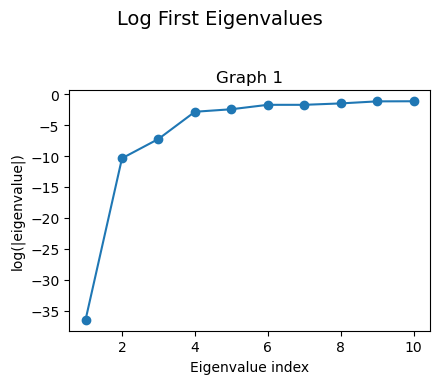

In [11]:
similarity_matrix_mutual_knn = get_similarity_matrix_from_distance_matrix(
    distance_matrix,
    sim_graph_type=best_params_mutual_knn["sim_graph_type"],
    epsilon=best_params_mutual_knn["mutual_knn"],
)

res_mutual_knn = Spectral_Clustering(
    similarity_matrix_knn,
    K=best_params_mutual_knn["K"],
    random_state=random_state,
)

plot_eigenvalues([res_mutual_knn.eigenvalues])

In [12]:
parameter_grid_eps_neighborhood = {
    "sim_graph_type": ["eps_neighbor"],
    "K": [50],  # Just a place holder, doesn't affect anything
    "sigma": [0],
    "knn": [0],
    "mutual_knn": [0],
    "epsilon": [
        0.05,
        0.1,
        0.15,
        0.2,
        0.25,
        0.3,
        0.5,
        0.75,
        1.0,
        1.25,
        1.5,
        2.0,
        4.0,
        8.0,
    ],
}

best_params_eps_neighborhood = find_best_params_with_eigengap_grid_search(
    distance_matrix,
    param_grid=parameter_grid_eps_neighborhood,
    random_state=random_state,
)
print(best_params_eps_neighborhood)

{'K': 50, 'epsilon': 0.05, 'knn': 0, 'mutual_knn': 0, 'sigma': 0, 'sim_graph_type': 'eps_neighbor'}
Eigengap:  0.2712864461218304
Average eigenvalue:  -1.3497085007011534e-18
Estimated K:  562

{'K': 50, 'epsilon': 0.1, 'knn': 0, 'mutual_knn': 0, 'sigma': 0, 'sim_graph_type': 'eps_neighbor'}
Eigengap:  0.04138349435202161

{'K': 50, 'epsilon': 0.15, 'knn': 0, 'mutual_knn': 0, 'sigma': 0, 'sim_graph_type': 'eps_neighbor'}
Eigengap:  0.02616091132635472

{'K': 50, 'epsilon': 0.2, 'knn': 0, 'mutual_knn': 0, 'sigma': 0, 'sim_graph_type': 'eps_neighbor'}
Eigengap:  0.02236721256571296

{'K': 50, 'epsilon': 0.25, 'knn': 0, 'mutual_knn': 0, 'sigma': 0, 'sim_graph_type': 'eps_neighbor'}
Eigengap:  0.01976638770368265

{'K': 50, 'epsilon': 0.3, 'knn': 0, 'mutual_knn': 0, 'sigma': 0, 'sim_graph_type': 'eps_neighbor'}
Eigengap:  0.0

{'K': 50, 'epsilon': 0.5, 'knn': 0, 'mutual_knn': 0, 'sigma': 0, 'sim_graph_type': 'eps_neighbor'}
Eigengap:  0.0

{'K': 50, 'epsilon': 0.75, 'knn': 0, 'mutual_knn':

In [13]:
best_params_eps_neighborhood

{'K': 562,
 'epsilon': 0.05,
 'knn': 0,
 'mutual_knn': 0,
 'sigma': 0,
 'sim_graph_type': 'eps_neighbor'}

c:\Users\Владимир\OneDrive\Documents\Mathematik\Statistical ML\Project\spectral_clustering\spectral_clustering.py:381: RuntimeWarning: divide by zero encountered in log
  vals = np.log(np.abs(eigs[:k]))


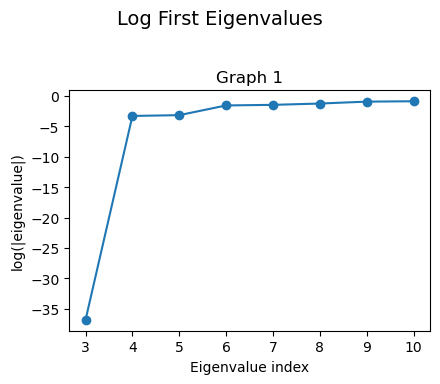

In [15]:
similarity_matrix_eps_neighborhood = get_similarity_matrix_from_distance_matrix(
    distance_matrix,
    sim_graph_type=best_params_eps_neighborhood["sim_graph_type"],
    epsilon=2.5,
)

res_eps_neighborhood = Spectral_Clustering(
    similarity_matrix_eps_neighborhood,
    K=best_params_eps_neighborhood["K"],
    random_state=random_state,
)

plot_eigenvalues([res_eps_neighborhood.eigenvalues])

In [16]:
parameter_grid_fully_connected = {
    "sim_graph_type": ["fully_connect"],
    "K": [50],  # Just a place holder, doesn't affect anything
    "sigma": [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.5, 0.75, 1.0, 2.0],
    "knn": [0],
    "mutual_knn": [0],
    "epsilon": [0],
}

best_params_fully_connected = find_best_params_with_eigengap_grid_search(
    distance_matrix,
    param_grid=parameter_grid_fully_connected,
    random_state=random_state,
)
print(best_params_fully_connected)

{'K': 50, 'epsilon': 0, 'knn': 0, 'mutual_knn': 0, 'sigma': 0.05, 'sim_graph_type': 'fully_connect'}
Eigengap:  0.0
Average eigenvalue:  -1.0559527873972317e-17
Estimated K:  2

{'K': 50, 'epsilon': 0, 'knn': 0, 'mutual_knn': 0, 'sigma': 0.1, 'sim_graph_type': 'fully_connect'}
Eigengap:  0.0

{'K': 50, 'epsilon': 0, 'knn': 0, 'mutual_knn': 0, 'sigma': 0.15, 'sim_graph_type': 'fully_connect'}
Eigengap:  0.0

{'K': 50, 'epsilon': 0, 'knn': 0, 'mutual_knn': 0, 'sigma': 0.2, 'sim_graph_type': 'fully_connect'}
Eigengap:  0.0

{'K': 50, 'epsilon': 0, 'knn': 0, 'mutual_knn': 0, 'sigma': 0.25, 'sim_graph_type': 'fully_connect'}
Eigengap:  0.0

{'K': 50, 'epsilon': 0, 'knn': 0, 'mutual_knn': 0, 'sigma': 0.3, 'sim_graph_type': 'fully_connect'}
Eigengap:  0.0

{'K': 50, 'epsilon': 0, 'knn': 0, 'mutual_knn': 0, 'sigma': 0.5, 'sim_graph_type': 'fully_connect'}
Eigengap:  0.0

{'K': 50, 'epsilon': 0, 'knn': 0, 'mutual_knn': 0, 'sigma': 0.75, 'sim_graph_type': 'fully_connect'}
Eigengap:  0.0

{'K': 5

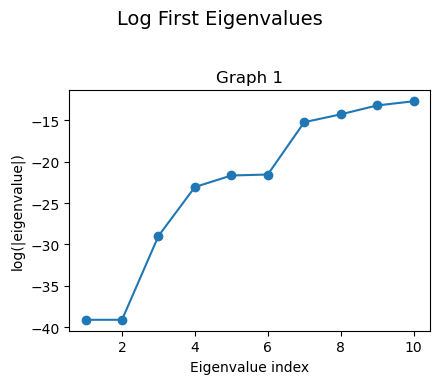

In [17]:
similarity_matrix_fully_connected = get_similarity_matrix_from_distance_matrix(
    distance_matrix,
    sim_graph_type=best_params_fully_connected["sim_graph_type"],
    sigma=best_params_fully_connected["sigma"],
)

res_fully_connected = Spectral_Clustering(
    similarity_matrix_fully_connected,
    K=best_params_fully_connected["K"],
    random_state=random_state,
)

plot_eigenvalues([res_fully_connected.eigenvalues])